# تحميل (استيراد) المكتبات الأساسية
# Importing

In [1]:
## Re-import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# تحميل البيانات Data downloading

In [2]:
## Reload the dataset
# https://www.sidc.be/observations/space-based-timelines/tsi
tsi_file = "ROB_TSI_composite_latest.txt"
df_tsi = pd.read_csv(
    tsi_file,
    delim_whitespace=True,
    comment="#",
    header=None,
    usecols=[0, 1],
    names=["Year", "TSI"],
    encoding="ISO-8859-1"
)

## Convert fractional year to datetime
df_tsi["Date"] = pd.to_datetime(df_tsi["Year"], format='%Y') + pd.to_timedelta((df_tsi["Year"] % 1) * 365.25, unit='D')

## Filter from 1975 onward and apply smoothing
df_tsi_filtered = df_tsi[df_tsi["Date"] >= "1975-01-01"].copy()
df_tsi_filtered["Smoothed"] = df_tsi_filtered["TSI"].rolling(window=365, center=True).mean()

## Define solar cycle years and numbers
cycle_years = [1976, 1986, 1996, 2008, 2019]
cycle_numbers = [21, 22, 23, 24, 25]

/var/folders/jh/6nq_ym693fn165j5sx8tmqy00000gn/T/ipykernel_81027/4119004383.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_tsi = pd.read_csv(


# العرض Visualization

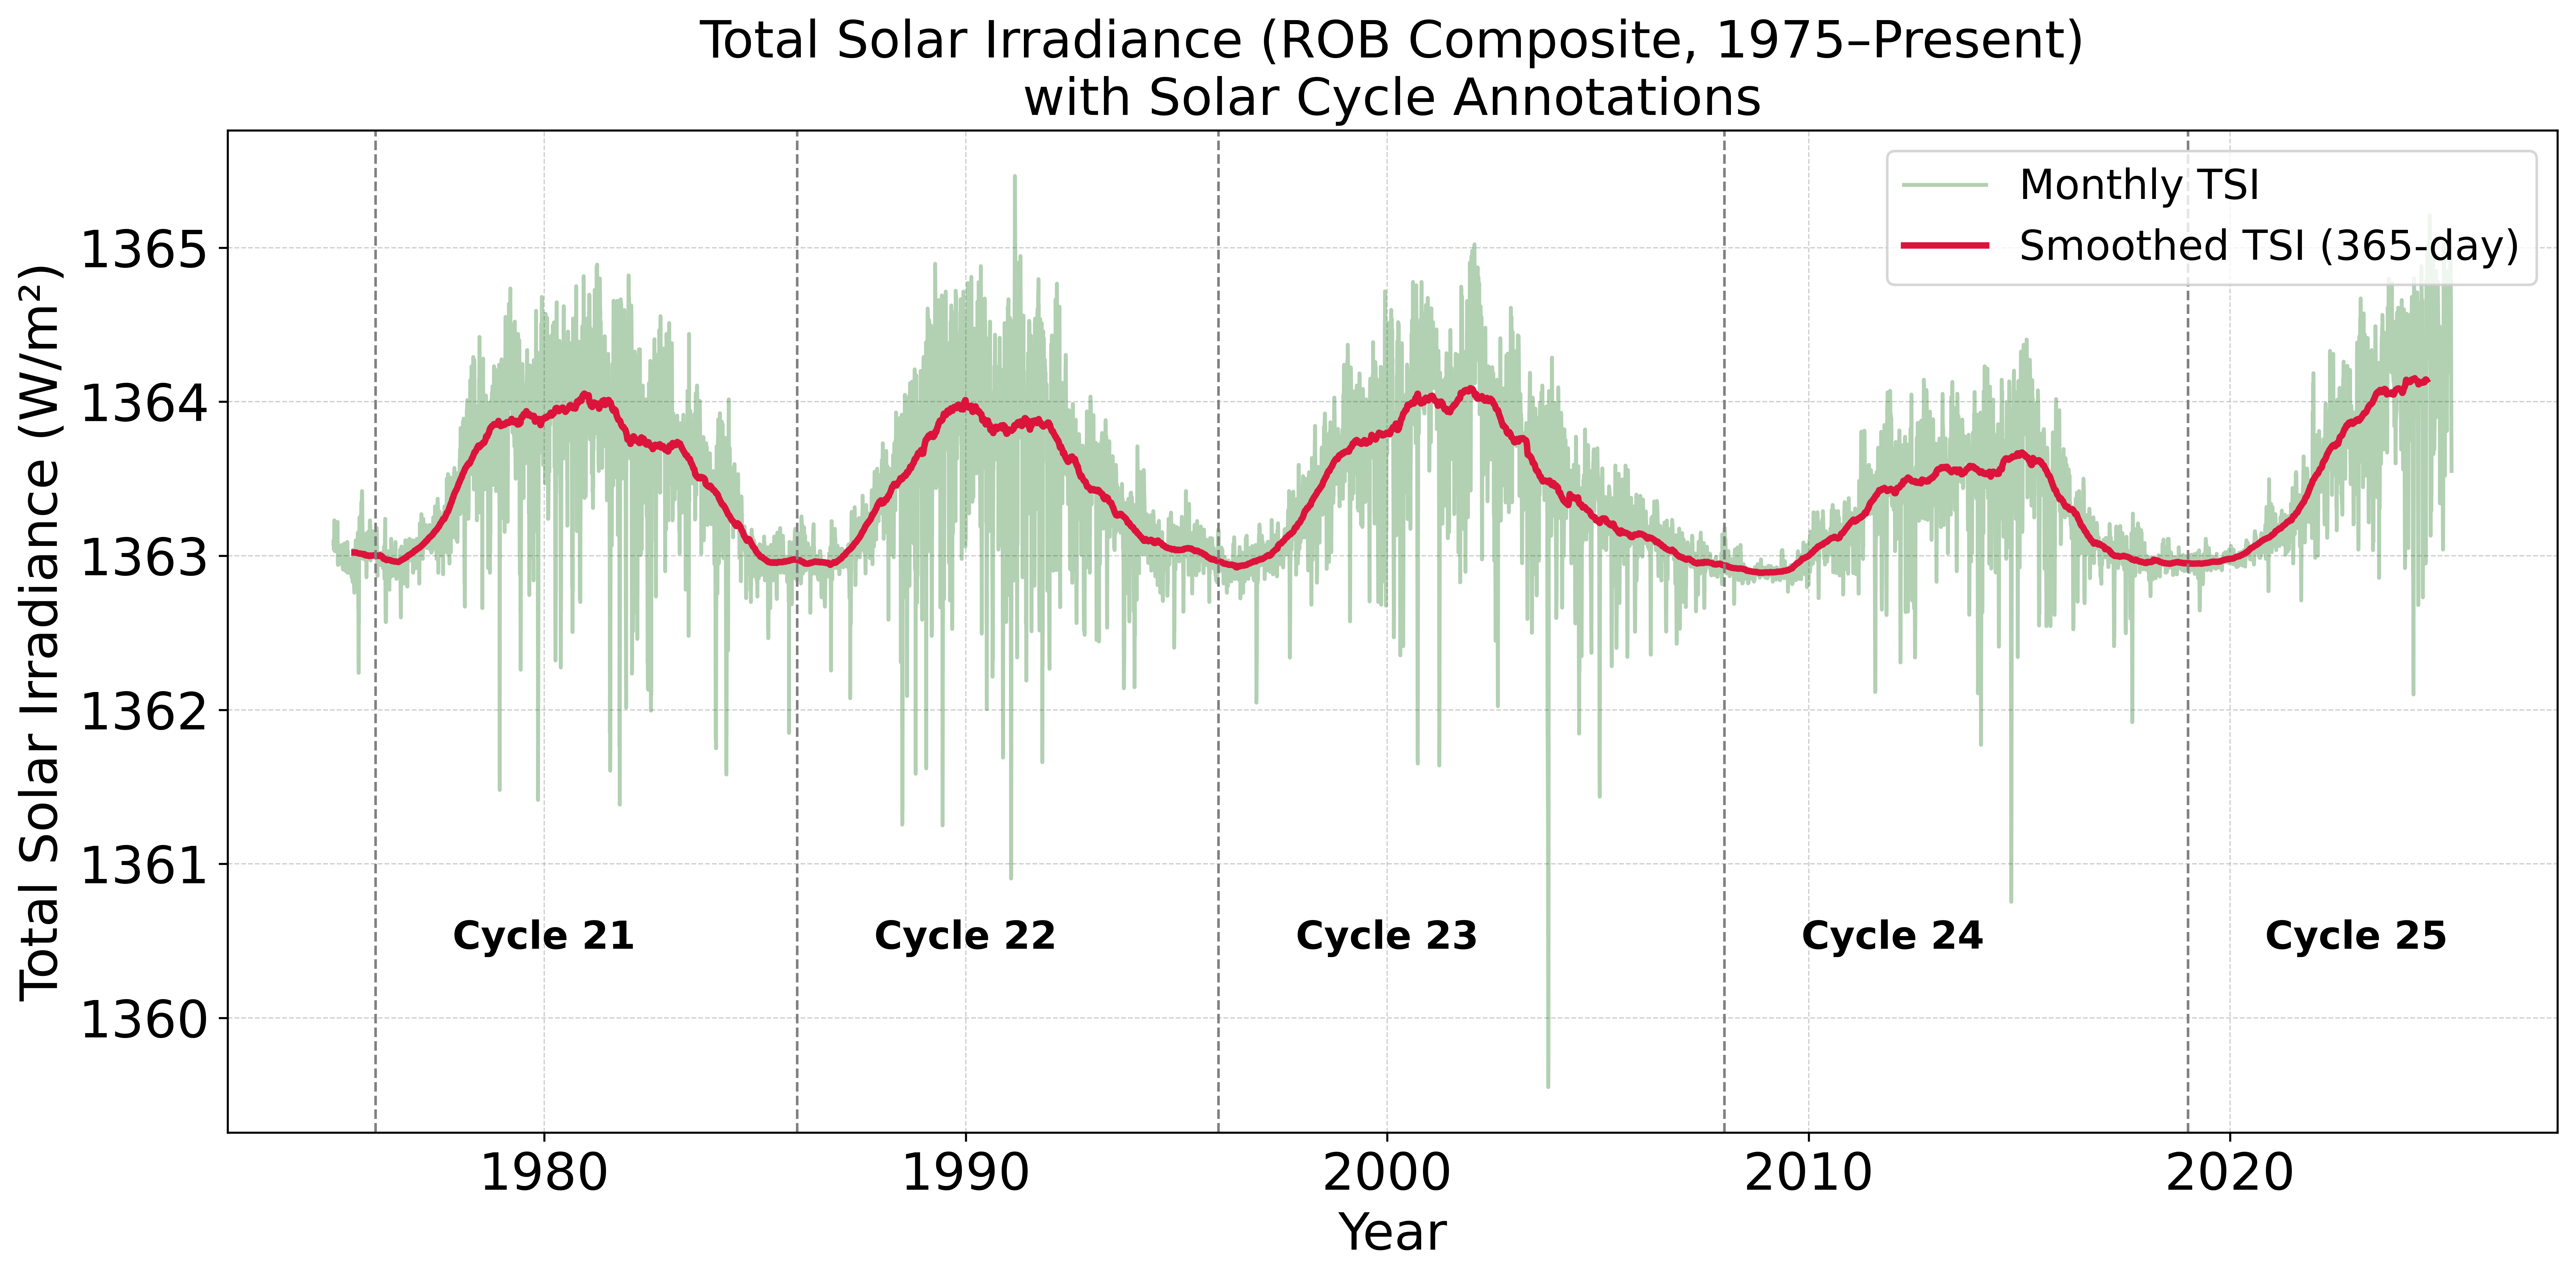

In [3]:
## Plot enhanced TSI with annotations
plt.figure(figsize=(14, 7), dpi=600)
plt.plot(df_tsi_filtered["Date"], df_tsi_filtered["TSI"], color='darkgreen', alpha=0.3, label='Monthly TSI')
plt.plot(df_tsi_filtered["Date"], df_tsi_filtered["Smoothed"], color='crimson', linewidth=2.5, label='Smoothed TSI (365-day)')

## Annotate solar cycles
for year, number in zip(cycle_years, cycle_numbers):
    plt.axvline(pd.Timestamp(f"{year}-01-01"), color='gray', linestyle='--', linewidth=1)
    plt.text(pd.Timestamp(f"{year+4}-01-01"), 1360.45, f"Cycle {number}", fontsize=15, color='black', ha='center', fontweight='bold')

plt.title("Total Solar Irradiance (ROB Composite, 1975–Present)\nwith Solar Cycle Annotations", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total Solar Irradiance (W/m²)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(loc='upper right', fontsize=16)
plt.tight_layout()
plt.show()


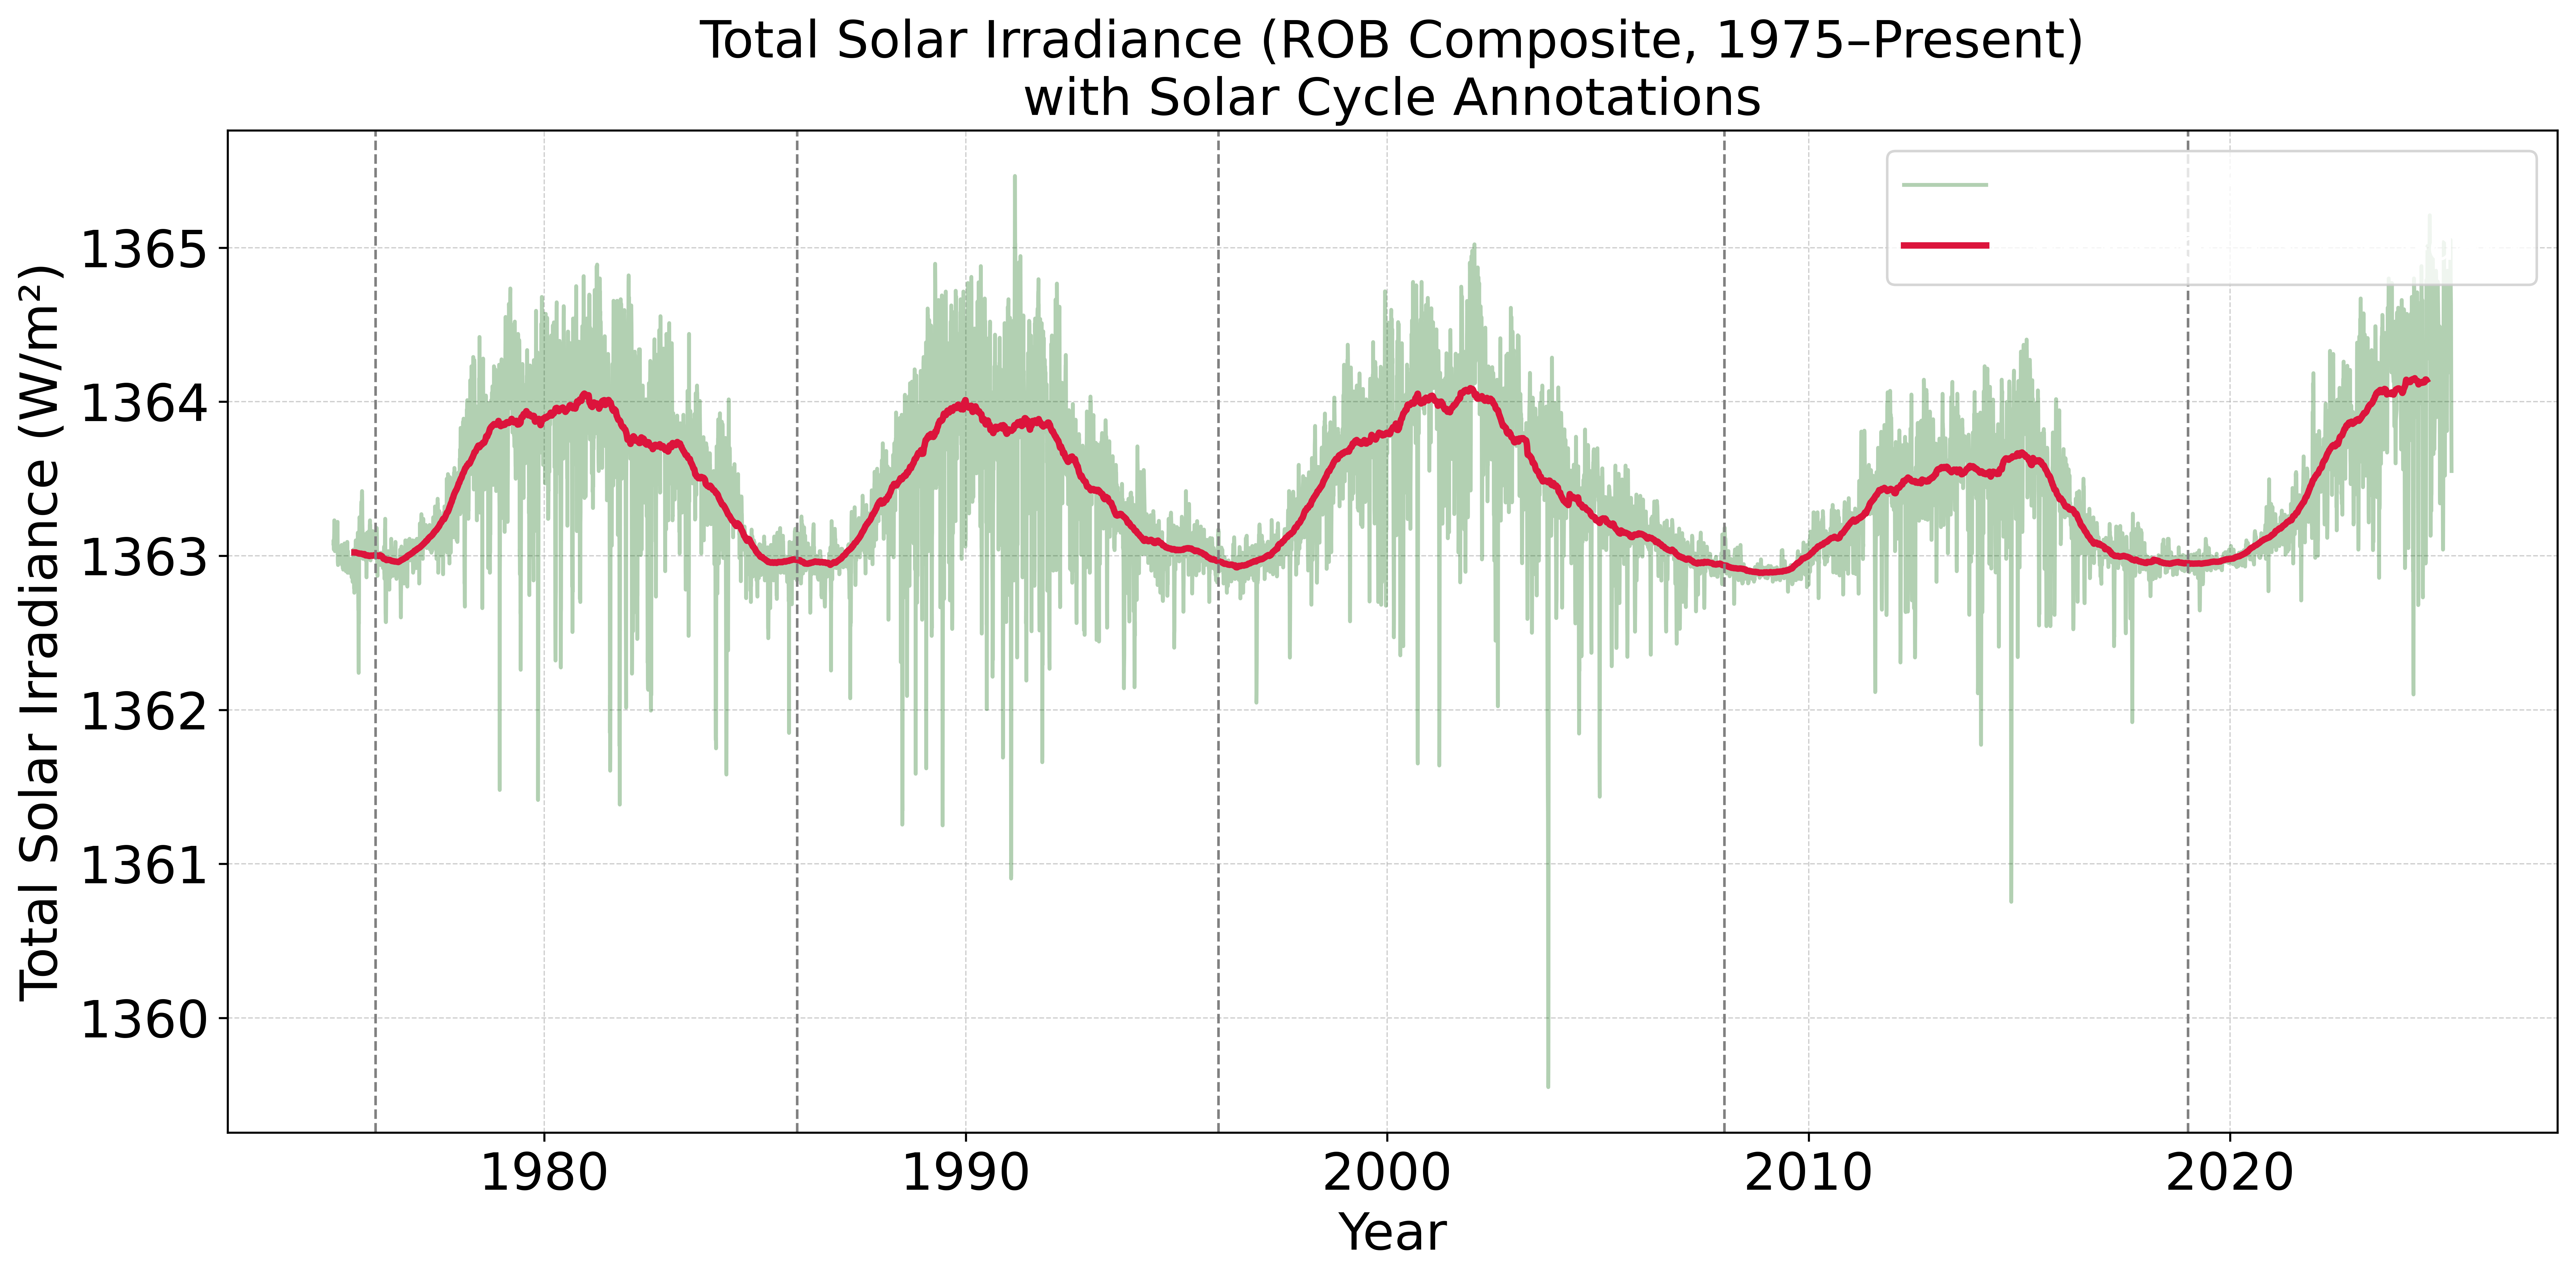

In [4]:
## Plot enhanced TSI with annotations
plt.figure(figsize=(14, 7), dpi=600)
plt.plot(df_tsi_filtered["Date"], df_tsi_filtered["TSI"], color='darkgreen', alpha=0.3, label='Monthly TSI')
plt.plot(df_tsi_filtered["Date"], df_tsi_filtered["Smoothed"], color='crimson', linewidth=2.5, label='Smoothed TSI (365-day)')

## Annotate solar cycles
for year, number in zip(cycle_years, cycle_numbers):
    plt.axvline(pd.Timestamp(f"{year}-01-01"), color='gray', linestyle='--', linewidth=1)
    #plt.text(pd.Timestamp(f"{year+4}-01-01"), 1360.45, f"Cycle {number}", fontsize=10, color='black', ha='center', fontweight='bold')

plt.title("Total Solar Irradiance (ROB Composite, 1975–Present)\nwith Solar Cycle Annotations", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total Solar Irradiance (W/m²)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
legend = plt.legend(loc='upper right', fontsize=16)
for text in legend.get_texts():
    text.set_color("white") 
    
plt.show()
